# Data Science - practicum

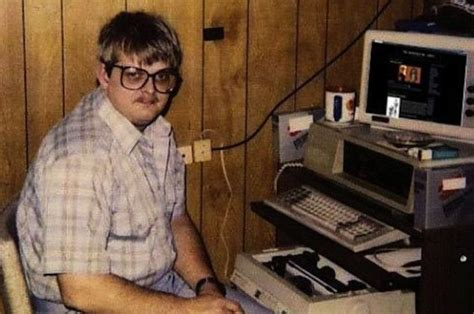

## Opdracht 1: Sea Level Change
### Global Average Absolute Sea Level Change, 1880-2014

https://www.kaggle.com/datasets/somesh24/sea-level-change

### Doel

- Inzicht in zeespiegelstijging
- Model maken dat stijging kan voorspellen

### Stap 1: Data inladen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as cp
# Use pandas to load 'sea_levels_2015.csv'

data = pd.read_csv("../data/sea_levels_2015.csv", index_col="Time", parse_dates=['Time'])


# To check if this set is complete, use:

data.isnull().sum()
# data is complete

GMSL                0
GMSL uncertainty    0
dtype: int64

In [2]:
data.head()
# GMSL = Global Mean Sea Level in mm

,GMSL,GMSL uncertainty
Time,,
1880-01-15,-183.0,24.2
1880-02-15,-171.1,24.2
1880-03-15,-164.3,24.2
1880-04-15,-158.2,24.2
1880-05-15,-158.7,24.2


### Stap 2: Data bekijken

<AxesSubplot: title={'center': 'Sea levels'}, xlabel='Time', ylabel='GMSL'>

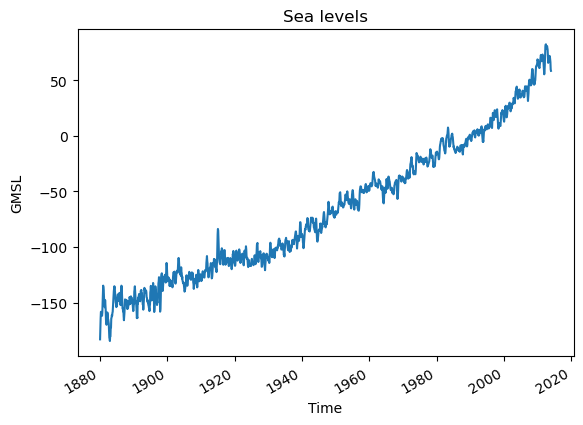

In [3]:
# Plot the sea level data
data['GMSL'].plot(title='Sea levels', ylabel='GMSL')


<AxesSubplot: title={'center': 'Sea levels'}, xlabel='Time', ylabel='GMSL uncertainty'>

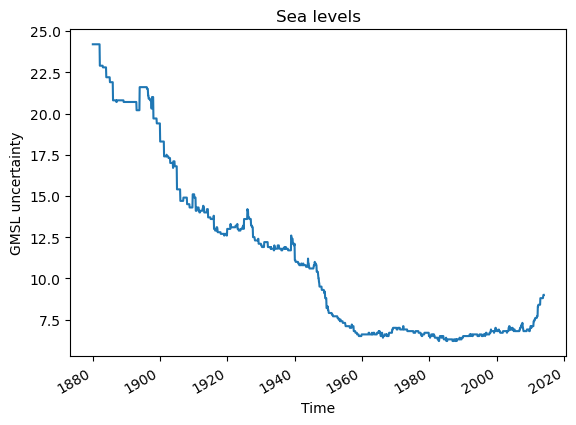

In [4]:
data['GMSL uncertainty'].plot(title='Sea levels', ylabel='GMSL uncertainty')
# uncertainty decreasing in time, while since about 2010 the uncertainty is increasing again

### Stap 3: Tends zoeken

- Zijn er trends zichtbaar in de data?
- Zo ja, welke zijn dat?
- Zoom desnoods wat in; neem als range 1 jaar

Bouw op basis van deze inzichten een model.

<AxesSubplot: xlabel='Time'>

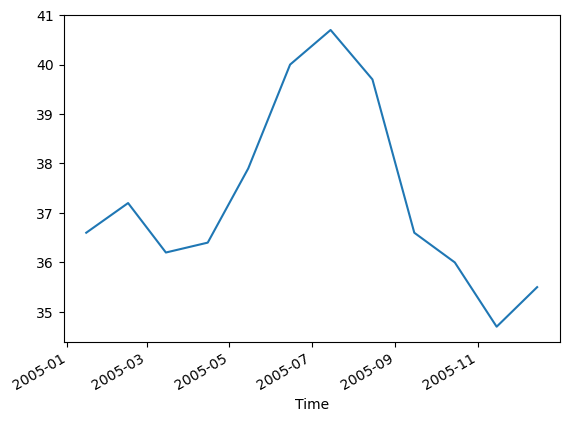

In [5]:
# Plot the sea level data for one year of data
data.loc[(data.index >= '2005') & (data.index < '2006'), 'GMSL'].plot()


<AxesSubplot: xlabel='month', ylabel='GMSL'>

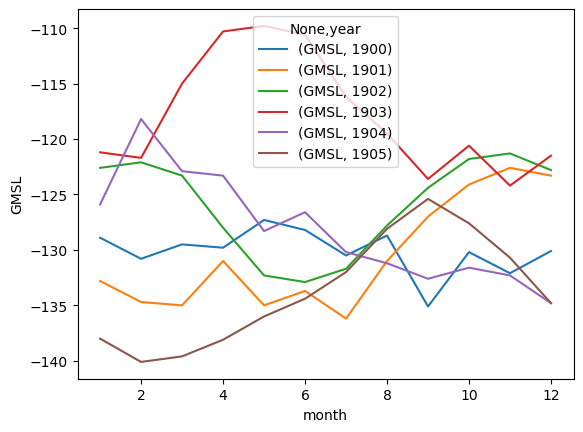

In [6]:
# Check for monthly seasonality

data['month'] = data.index.month
data['year'] = data.index.year
piv = pd.pivot_table(data.loc[(data.index >= '1900') & (data.index < '1906'), :], index=['month'], columns=['year'], values=['GMSL'])
piv.plot(ylabel='GMSL')

<AxesSubplot: xlabel='Time'>

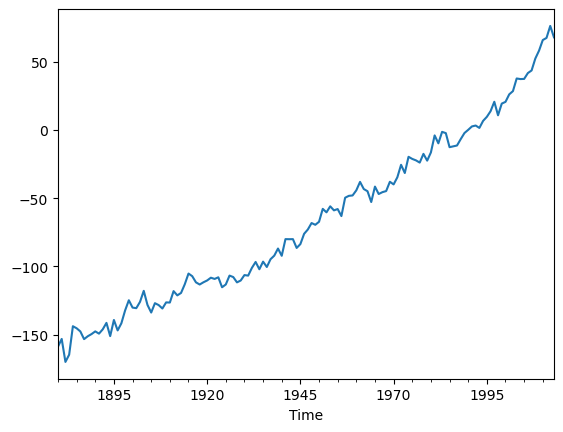

In [7]:
# resample to yearly data to get rid of some of the noise in monthly data
df_Y = data.resample('A').mean()

df_Y['GMSL'].plot()

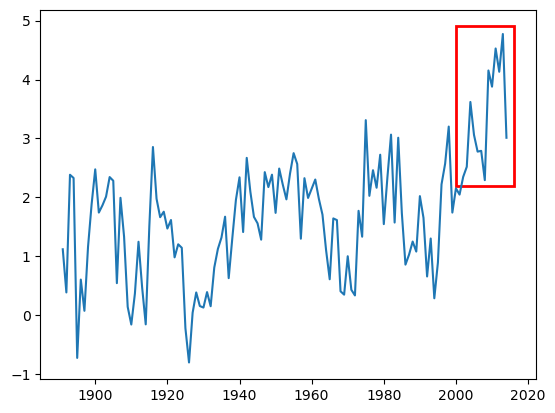

In [8]:
# From the chart above it looks like we can see sea levels rising faster in the last couple of years
# Let check if we can see that more clearly by taking a rolling mean and plotting the difference (y_i - y_i-1)
df_Y['rolling 3Y'] = df_Y['GMSL'].rolling(3).mean()
df_Y['rolling 10Y'] = df_Y['GMSL'].rolling(10).mean()
# df_Y['rolling 10Y'].diff().plot()

from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from datetime import date

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot(df_Y.index, df_Y['rolling 10Y'].diff())

start_date = date(2000, 1, 1)
end_date = date(2016, 1, 1)
start = mdates.date2num(start_date)
end = mdates.date2num(end_date)
width = end - start

#add rectangle to plot
ax.add_patch(Rectangle((start, 2.2), width, 2.7,
             edgecolor = 'red',
             facecolor = 'none',
             lw=2))

#display plot
plt.show()

6.292956689029466e-18 5.974567690645947e-08 -35.39894215051433


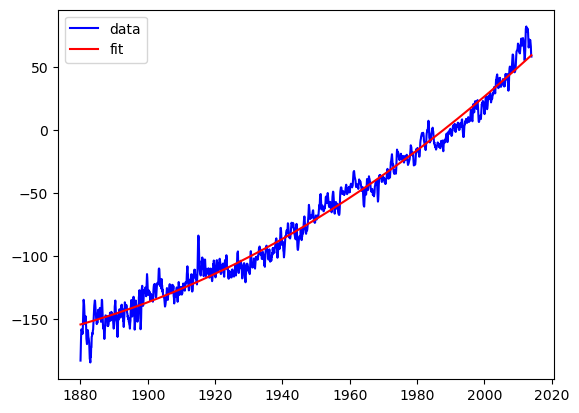

In [9]:
# def model(a, b, c, ...):
def calc_sea_level(x, a, b, c):
    return a*x**2 + b*x + c

# Fit your model
def get_timestamp(x):
    return x.timestamp()

popt, _ = cp.optimize.curve_fit(calc_sea_level, data.index.map(get_timestamp), data['GMSL'])
print(*popt)


# Plot fit

plt.plot(data.index, data['GMSL'], 'b-', label="data")
plt.plot(data.index, calc_sea_level(data.index.map(get_timestamp), *popt), 'r-', label="fit")
plt.legend()
plt.show()

### Stap 4: Voorspellen

Kun je op basis van je model voorspellen wat de gemiddelde zeespiegel is in 2100?

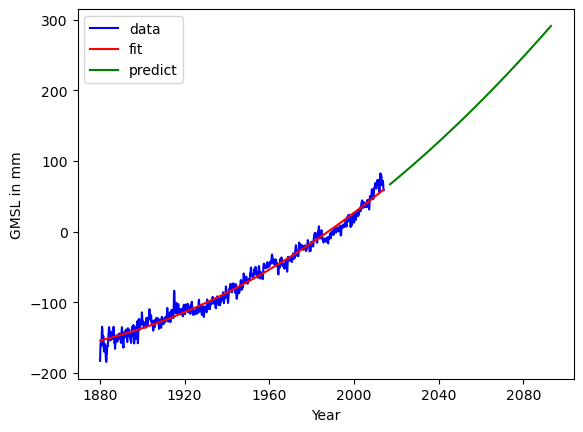

In [10]:
# Extrapolate to 2100 with your model
# create daterange to year 2100
datelist = pd.date_range('2016-01-01', periods=77, freq='A')
timestamp_range = [x.timestamp() for x in datelist]

predicted_GMSL_to_2100 = calc_sea_level(datelist.map(get_timestamp), *popt)
predicted_GMSL_to_2100

# Optional: can you plot the future up to 2100?
plt.plot(data.index, data['GMSL'], 'b-', label="data")
plt.plot(data.index, calc_sea_level(data.index.map(get_timestamp), *popt), 'r-', label="fit")
plt.plot(datelist, predicted_GMSL_to_2100, 'g-', label="predict")
plt.xlabel('Year')
plt.ylabel('GMSL in mm')
plt.legend()
plt.show()


Is je uitkomst verontrustend?

## Opdracht 2: COVID-19
### Visualizations, Predictions, Forecasting

https://www.kaggle.com/code/neelkudu28/covid-19-visualizations-predictions-forecasting

### Doel

- Inzicht in verloop COVID in India
- Model maken dat verloop kan voorspellen
- Ervaren hoe het is om met beperkte data de toekomst te moeten voorspellen

### Stap 1: Data inladen

In [11]:
# Use pandas to load 'covid_19_data.csv'

covid= pd.read_csv("../data/covid_19_data.csv", index_col="ObservationDate", parse_dates=['ObservationDate'])

# To check if this set is complete, use:

covid.isnull().sum()

SNo                   0
Province/State    31153
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [12]:
covid.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


### Stap 2: Filteren

We gaan het verloop van India bekijken.

In [13]:
# Put the India data in an india dataframe

covid_india = covid[covid['Country/Region'] == "India"].copy()

# Make a new column with the active cases, use:

# Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
covid_india['active_cases'] = covid_india['Confirmed'] - covid_india['Recovered'] - covid_india['Deaths']
print(covid_india.head())
covid_india.tail()

                 SNo Province/State Country/Region          Last Update  \
ObservationDate                                                           
2020-01-30       431            NaN          India        1/30/20 16:00   
2020-01-31       492            NaN          India      1/31/2020 23:59   
2020-02-01       548            NaN          India       1/31/2020 8:15   
2020-02-02       608            NaN          India  2020-02-02T06:03:08   
2020-02-03       673            NaN          India  2020-02-03T21:43:02   

                 Confirmed  Deaths  Recovered  active_cases  
ObservationDate                                              
2020-01-30             1.0     0.0        0.0           1.0  
2020-01-31             1.0     0.0        0.0           1.0  
2020-02-01             1.0     0.0        0.0           1.0  
2020-02-02             2.0     0.0        0.0           2.0  
2020-02-03             3.0     0.0        0.0           3.0  


,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_cases
ObservationDate,,,,,,,,
2020-08-29,98182,Tripura,India,2020-08-30 04:28:22,11307.0,98.0,7232.0,3977.0
2020-08-29,98195,Unknown,India,2020-08-30 04:28:22,0.0,0.0,0.0,0.0
2020-08-29,98204,Uttar Pradesh,India,2020-08-30 04:28:22,219457.0,3356.0,162741.0,53360.0
2020-08-29,98205,Uttarakhand,India,2020-08-30 04:28:22,18571.0,250.0,12586.0,5735.0
2020-08-29,98231,West Bengal,India,2020-08-30 04:28:22,156766.0,3126.0,127644.0,25996.0


In [14]:
# we need to group by Country to sum all Provinces/States together
covid_india = covid_india.reset_index().groupby(by=['ObservationDate','Country/Region']).sum()
covid_india.rename_axis(index=["Date", "Country"], inplace=True)
covid_india.reset_index(inplace=True)
covid_india

/tmp/ipykernel_428/140688432.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_india = covid_india.reset_index().groupby(by=['ObservationDate','Country/Region']).sum()


,Date,Country,SNo,Confirmed,Deaths,Recovered,active_cases
0,2020-01-30,India,431,1.0,0.0,0.0,1.0
1,2020-01-31,India,492,1.0,0.0,0.0,1.0
2,2020-02-01,India,548,1.0,0.0,0.0,1.0
3,2020-02-02,India,608,2.0,0.0,0.0,2.0
4,2020-02-03,India,673,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
208,2020-08-25,India,3514419,3224547.0,59357.0,2458339.0,706851.0
209,2020-08-26,India,3541873,3310234.0,60472.0,2523771.0,725991.0
210,2020-08-27,India,3569327,3387500.0,61529.0,2583948.0,742023.0
211,2020-08-28,India,3596781,3463972.0,62550.0,2648998.0,752424.0


### Stap 3: Range selecteren

De uitbraak is in volle gang.

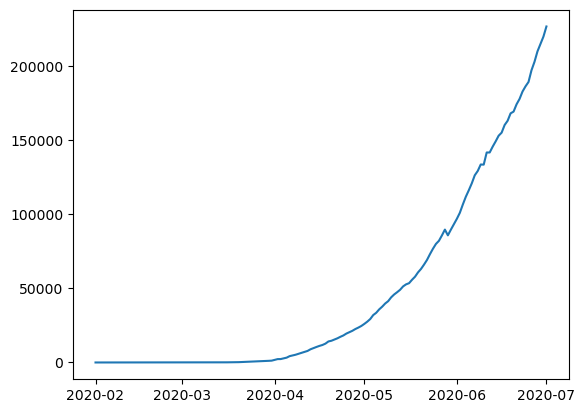

In [15]:
# Select the range from februari to july

plt.plot(covid_india[(covid_india['Date'] >= '2020-02-01') & (covid_india['Date'] <= '2020-07-01')]['Date'], covid_india[(covid_india['Date'] >= '2020-02-01') & (covid_india['Date'] <= '2020-07-01')]['active_cases'])

### Stap 4: Voorspellen

Aan jou de taak om het verloop tot en met december te voorspellen.

1.7110533130576252e-16 -8.122557857678334e-07 1285.28799143162 -677932494256.5864


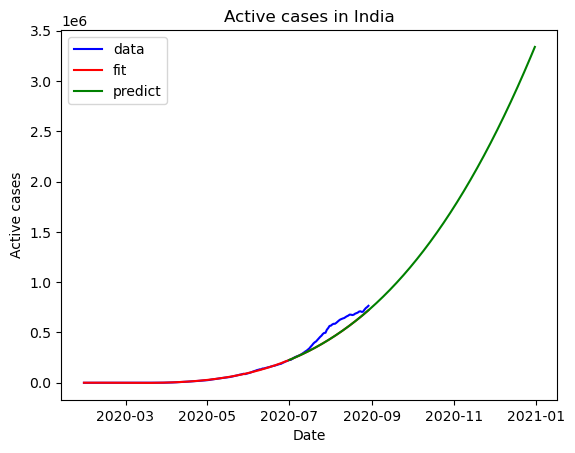

In [18]:
# def model(a, b, c, ...):
def calc_covid_cases(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d


# Fit your model
def get_timestamp(x):
    return x.timestamp()

popt, _ = cp.optimize.curve_fit(calc_covid_cases, covid_india[(covid_india['Date'] >= '2020-02-01') & (covid_india['Date'] <= '2020-07-01')]['Date'].map(get_timestamp), covid_india[(covid_india['Date'] >= '2020-02-01') & (covid_india['Date'] <= '2020-07-01')]['active_cases'])
print(*popt)

datelist = pd.date_range('2020-07-01', periods=184, freq='D')
timestamp_range = [x.timestamp() for x in datelist]

predicted_covid_cases_to_dec20 = calc_covid_cases(datelist.map(get_timestamp), *popt)

# Plot fit

plt.plot(covid_india['Date'], covid_india['active_cases'], 'b-', label="data")
plt.plot(covid_india['Date'], calc_covid_cases(covid_india['Date'].map(get_timestamp), *popt), 'r-', label="fit")
plt.plot(datelist, predicted_covid_cases_to_dec20, 'g-', label="predict")
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Active cases in India')
plt.legend()
plt.show()

Zit je er ver naast?

## Opdracht 3: Coca Cola Stock
### Performance of Coca Cola Stock from 1962 to today

https://www.kaggle.com/datasets/kalilurrahman/coca-cola-stock-live-and-updated

### Doel

- De koers van Coca Cola voorspellen
- Rijk worden!!!

### Stap 1: Data inladen

In [ ]:
# Use pandas to load 'coca_cola_stock_history.csv'

# ...

# To check if this set is complete, use:

# levels.isnull().sum()

### Stap 2: Range selecteren

Het is het jaar 1997 dus je beschikt over aardig wat koersdata.

In [ ]:
# Select the data between begin 1962 and end 1997

# ...

### Stap 3: Tends zoeken

- Zijn er trends zichtbaar in de data?
- Zo ja, welke zijn dat?

Bouw op basis van deze inzichten een model.

In [ ]:
# def model(a, b, c, ...):
#   ...

# Fit your model

# ...

# Plot your fit

# ...

### Stap 4: Big bet

- Doe op basis van je model een voorspelling voor december 2021

Dit is de prijs die je gaat betalen voor je _future_.

In [ ]:
# Extrapolate to 2021 with your model

# ...

### Stap 5: Winning...?

Je hebt 10.000 _futures_ Coca Cola gekocht. Dit betekent dat je de aandelen Coca Cola MOET kopen.

- Als de waarde lager is dan je voorspelling: bingo!

In [ ]:
# Compute your profit or loss

# ...

...or losing? Hoeveel geld heb je gewonnen / verloren?